# Week 1

In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. **Today, to keep things easy, we will just work with the data from 2003 to 2018** (from January 1st 2003 to December 31st 2017 to be exact). 
> * Thus, you may simply download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * Now generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

In [15]:
df= pd.read_csv('crime.csv') # load the csv data into pandas dataframe 

In [16]:
df.head() # displaying the top rows of the pandas dataframe 

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [17]:
df['Year'] = df.Date.apply(lambda text: text.split('/')[2]) # add a column year based on the column Date

In [18]:
# Drop YEAR 2018 due to missing data
year_index=df[df.Year=='2018'].index
df.drop(year_index, inplace=True)

In [19]:
print(f'The total number of crimes is: {len(df)}') #Report the total number of crimes in the dataset.
print(f"There are {len(df['Category'].unique())} categories of crime: {df['Category'].unique()}") #List the various categories of crime. How many are there?

The total number of crimes is: 2084466
There are 37 categories of crime: ['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']


In [20]:
# List the number of crimes in each category.
category = df['Category'].value_counts()
category

LARCENY/THEFT                  464365
OTHER OFFENSES                 296411
NON-CRIMINAL                   231689
ASSAULT                        163158
VEHICLE THEFT                  124759
DRUG/NARCOTIC                  116352
VANDALISM                      111933
WARRANTS                        98234
BURGLARY                        88971
SUSPICIOUS OCC                  77392
ROBBERY                         53417
MISSING PERSON                  43297
FRAUD                           40540
FORGERY/COUNTERFEITING          22800
SECONDARY CODES                 21905
WEAPON LAWS                     20397
TRESPASS                        18681
PROSTITUTION                    16453
STOLEN PROPERTY                 11193
DISORDERLY CONDUCT               9838
DRUNKENNESS                      9676
RECOVERED VEHICLE                8688
SEX OFFENSES, FORCIBLE           8471
DRIVING UNDER THE INFLUENCE      5560
KIDNAPPING                       4228
ARSON                            3778
EMBEZZLEMENT

## Exercise 2: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences. This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). Mine looks like this 

<AxesSubplot: title={'center': 'Crime occurencies by category'}, xlabel='Category', ylabel='Occurances'>

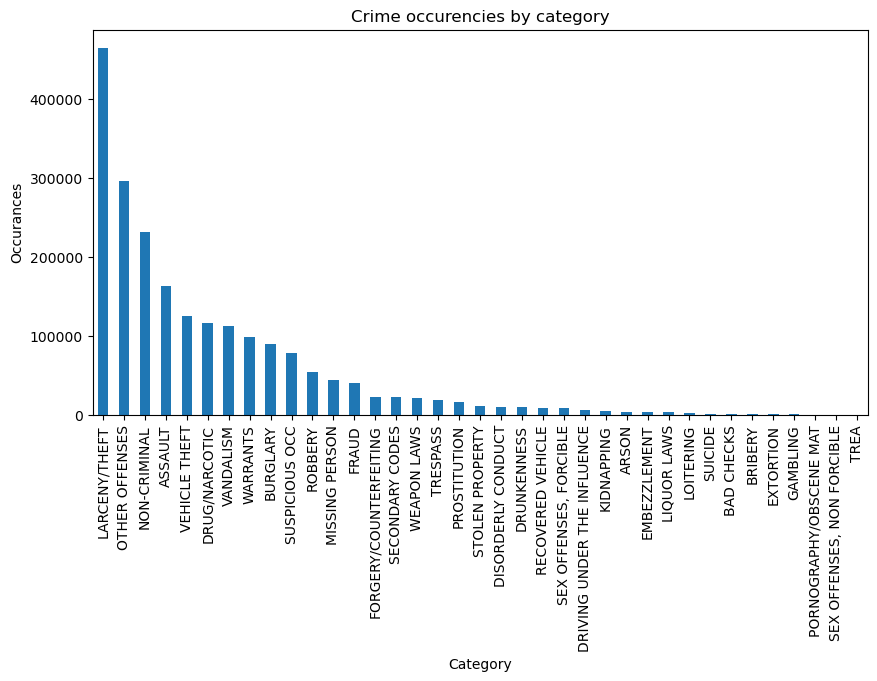

In [21]:
plt.figure(figsize = (10,5))
plt.title('Crime occurencies by category')
plt.ylabel("Occurances")
plt.xlabel("Category")
category.plot.bar()

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

## Exercise 3: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes? (**hint** if your result is 2018, go back and see what I wrote about the date range).
> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [22]:
# print total number of crimes per year
print(df.groupby(df.Year).PdId.count())
print(df.groupby(df.Year).PdId.count().idxmax())
print(df.groupby(df.Year).PdId.count().max())
print(df.groupby(df.Year).PdId.count().idxmin())
print(df.groupby(df.Year).PdId.count().min())

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
Name: PdId, dtype: int64
2015
151459
2011
126713


<AxesSubplot: title={'center': 'Crimes per Year'}, xlabel='Year', ylabel='Crime-Counts'>

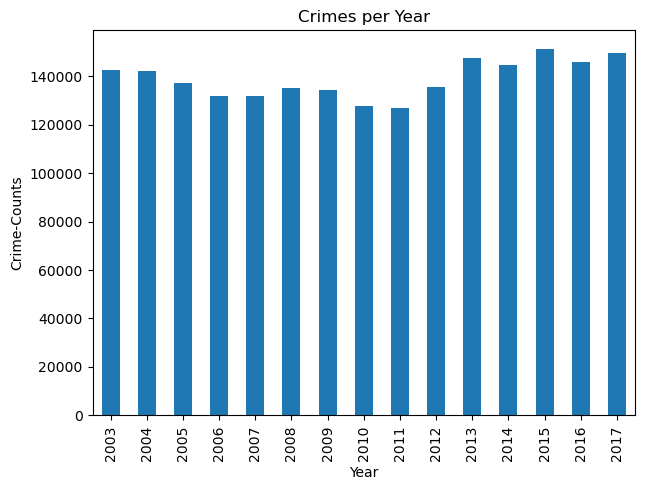

In [23]:
plt.figure(figsize = (7,5))
plt.title("Crimes per Year")
plt.xlabel('Year')
plt.ylabel('Crime-Counts')
df.groupby(df.Year).PdId.count().plot.bar()

In [24]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [25]:
df_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'Year']).size().unstack()
df_grouped

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Category,,,,,,,,,,,,,,,
ASSAULT,11409,10968,10154,10779,10900,11063,10681,10659,10589,10519,10790,10398,11090,11546,11613
BURGLARY,6013,6721,7051,6967,5422,5650,5366,4942,4927,6197,6160,6033,5903,5791,5828
DISORDERLY CONDUCT,877,808,680,510,570,778,948,815,752,699,459,343,547,657,395
DRIVING UNDER THE INFLUENCE,287,243,195,264,311,407,579,457,466,421,447,379,428,377,299
DRUG/NARCOTIC,9784,9792,8444,8943,10360,11456,11771,9036,6802,6307,6672,5324,4194,4202,3265
DRUNKENNESS,657,592,628,695,665,705,801,701,646,640,951,617,576,465,337
LARCENY/THEFT,26185,24337,25226,27227,25599,25636,25419,24212,25629,30760,36216,37860,41980,40365,47714
PROSTITUTION,1937,1505,1088,1264,1848,1662,1457,1281,1078,678,678,449,370,635,523
ROBBERY,3113,3297,3490,4031,3928,4150,3508,3232,3218,3850,4064,3344,3697,3230,3265


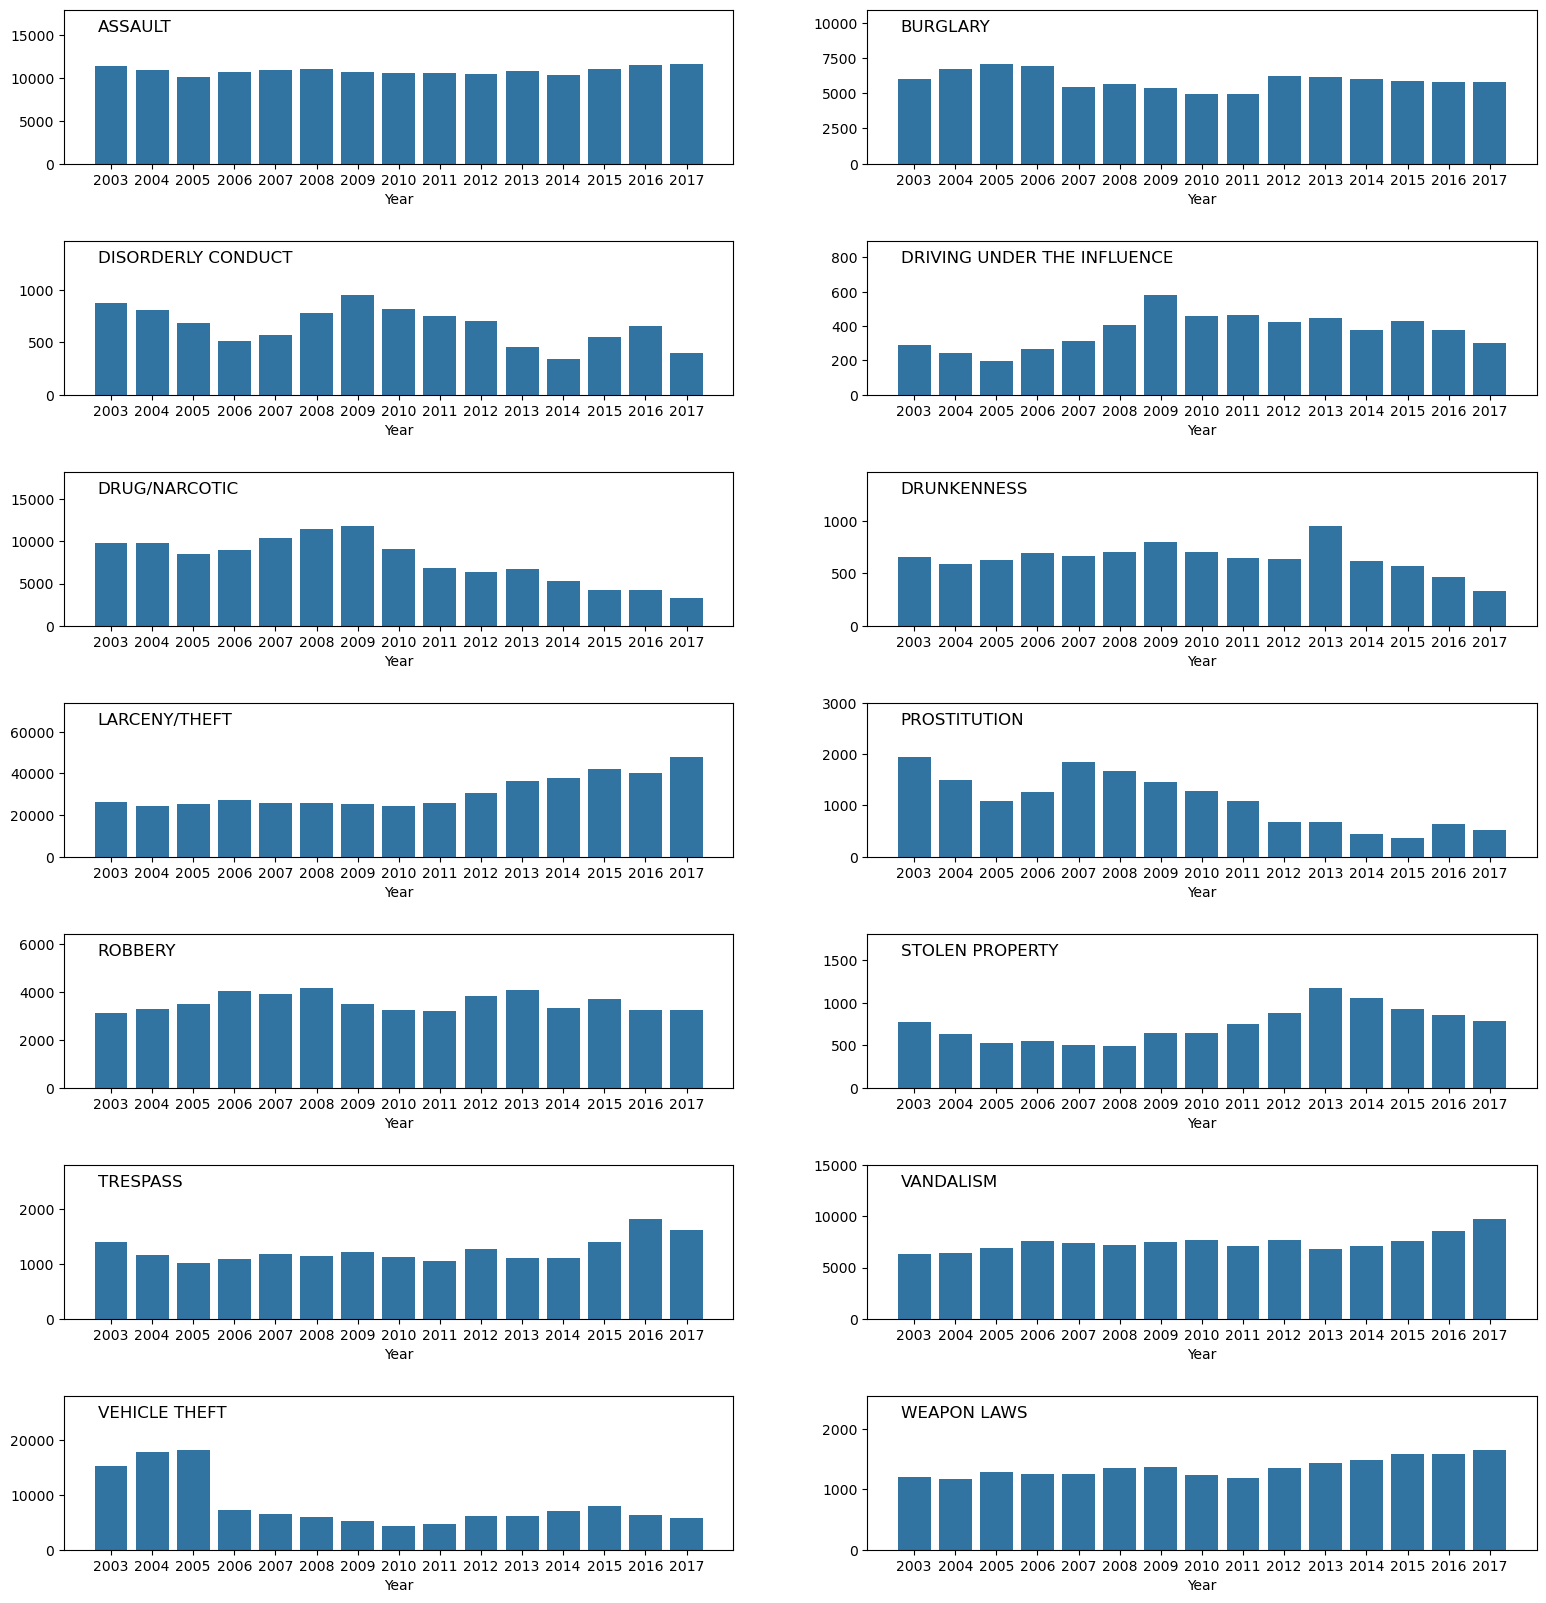

In [26]:
fig = plt.figure(figsize=(19, 20))

for plot_index in range(1, 15):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(7, 2, plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.5)
    
    ax = sns.barplot(x = df_grouped.iloc[plot_index - 1].index, y = df_grouped.iloc[plot_index - 1].values, color = sns.color_palette()[0])
    plt.margins(y = 0.55, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_grouped.iloc[plot_index - 1].name, y = 0.80, x = 0.05, loc = 'left') # set indentation 'left' and x, y added/subtracted, compared to th